# COVID-19 DATA ANALYSIS PART-1

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Task 1: Load and Pre-process the Dataset
# a) Use Pandas to load the dataset from the provided URL.
import pandas as pd
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
data = pd.read_csv(url)

print("Before Preprocessed Dataset:")
print(data.head(1000))
print("----------------------------------------------------------------------------------------------------------------")

# b) Inspect the data for any missing values and handle them appropriately.
print("\nMissing values in the dataset:")
print(data.isnull().sum())
print("\n No missing values")
print("----------------------------------------------------------------------------------------------------------------")

# c) Convert the date column to a ‘datetime’ format for easier manipulation.
data['Date'] = pd.to_datetime(data['Date'])
print("\nData types after conversion:")
print(data.dtypes)
print("----------------------------------------------------------------------------------------------------------------")

print("\nAfter Preprocessed Dataset:")
print(data.head())

Before Preprocessed Dataset:
           Date      Country  Confirmed  Recovered  Deaths
0    2020-01-22  Afghanistan          0          0       0
1    2020-01-23  Afghanistan          0          0       0
2    2020-01-24  Afghanistan          0          0       0
3    2020-01-25  Afghanistan          0          0       0
4    2020-01-26  Afghanistan          0          0       0
..          ...          ...        ...        ...     ...
995  2020-07-19      Albania       4090       2311     112
996  2020-07-20      Albania       4171       2352     113
997  2020-07-21      Albania       4290       2397     117
998  2020-07-22      Albania       4358       2463     120
999  2020-07-23      Albania       4466       2523     123

[1000 rows x 5 columns]
----------------------------------------------------------------------------------------------------------------

Missing values in the dataset:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

 No 

In [2]:
# Task 2: Data Exploration and Cleaning
# a) Display basic information about the dataset, such as the number of rows and columns, data types, and a sample of the first few rows.
print("Number of rows and columns:", data.shape)
print("----------------------------------------------------------------------------------------------------------------")
print("Data types:\n", data.dtypes)
print("----------------------------------------------------------------------------------------------------------------")
print("First few rows:\n", data.head())
print("----------------------------------------------------------------------------------------------------------------")
print("Basic information:")
print(data.info())
print("----------------------------------------------------------------------------------------------------------------")

# b) Identify and handle any outliers or inconsistencies in the data.
Q1 = data[['Confirmed', 'Recovered', 'Deaths']].quantile(0.25)
Q3 = data[['Confirmed', 'Recovered', 'Deaths']].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):")
print(IQR)
print("----------------------------------------------------------------------------------------------------------------")
outliers = ((data[['Confirmed', 'Recovered', 'Deaths']] < (Q1 - 1.5 * IQR)) | 
            (data[['Confirmed', 'Recovered', 'Deaths']] > (Q3 + 1.5 * IQR)))

print("Outliers detected:")
print(outliers.any(axis=1).sum(), "rows with outliers")
print("----------------------------------------------------------------------------------------------------------------")
data_cleaned = data[~outliers.any(axis=1)]

print("Data shape after removing outliers:", data_cleaned.shape)
print(data_cleaned.describe())

Number of rows and columns: (161568, 5)
----------------------------------------------------------------------------------------------------------------
Data types:
 Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object
----------------------------------------------------------------------------------------------------------------
First few rows:
         Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0
----------------------------------------------------------------------------------------------------------------
Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data

---------------------Total Confirmed Cases---------------------


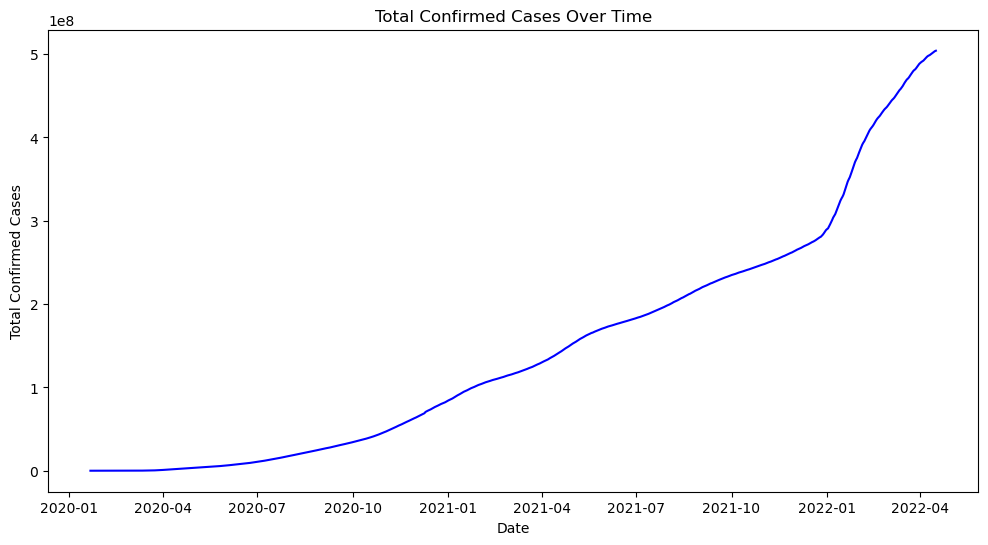

---------------------Total Deaths---------------------


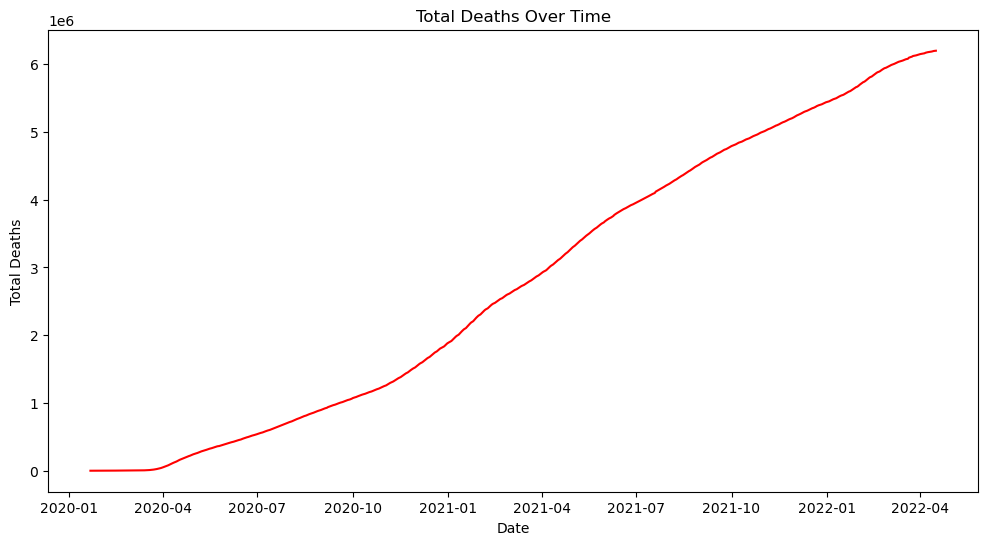

---------------------Total Recoveries---------------------


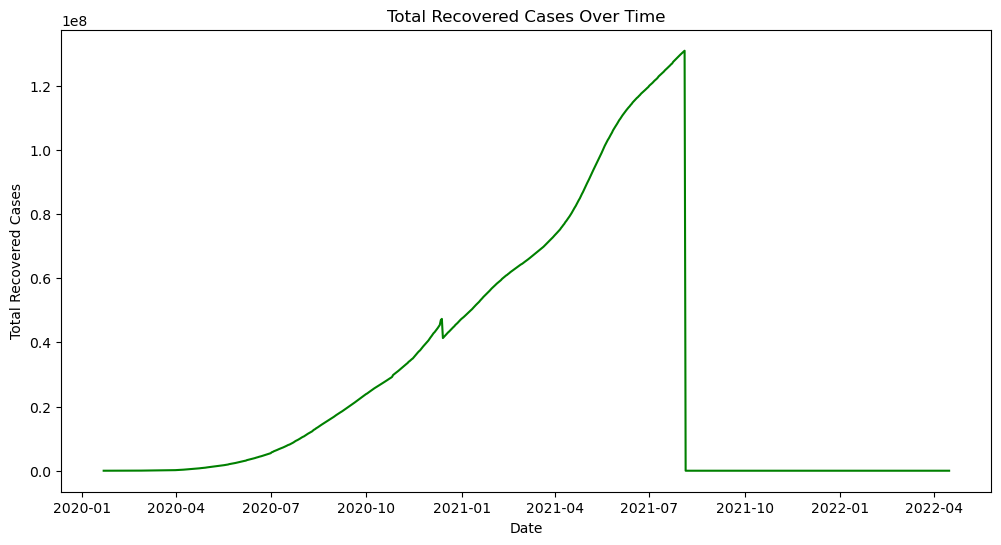

In [3]:
# Task 3: Visualize Global Trends
import matplotlib.pyplot as plt
import seaborn as sns
# a) Plot the total number of confirmed cases, deaths, and recoveries over time  using ‘Matplotlib’ and ‘Seaborn’.
# b) Use line plots to visualize these trends globally.
global_totals = data.groupby('Date').sum().reset_index()

print("---------------------Total Confirmed Cases---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Confirmed', color='blue')
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()

print("---------------------Total Deaths---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Deaths', color='red')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.show()

print("---------------------Total Recoveries---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Recovered', color='green')
plt.title('Total Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.show()

Enter the name of the country to visualize its COVID-19 trends: India


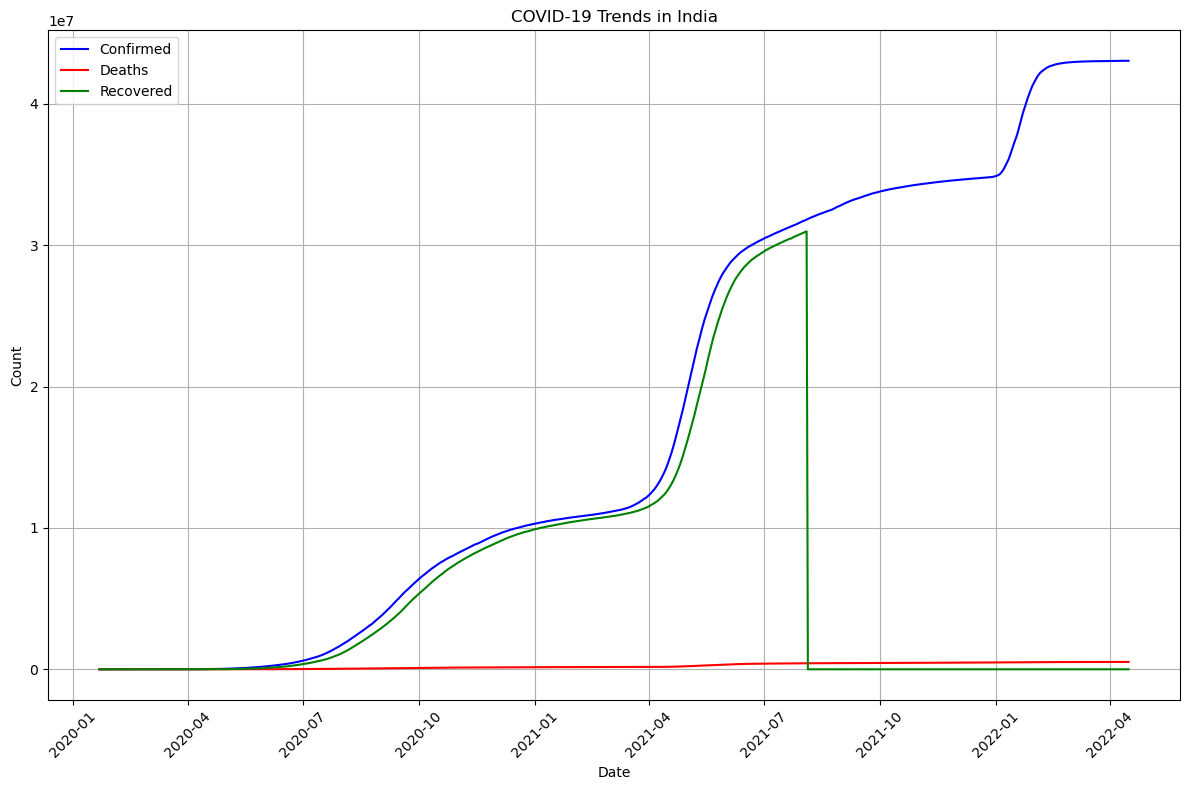

Enter the names of countries to compare, separated by commas: India, US, Afghanistan


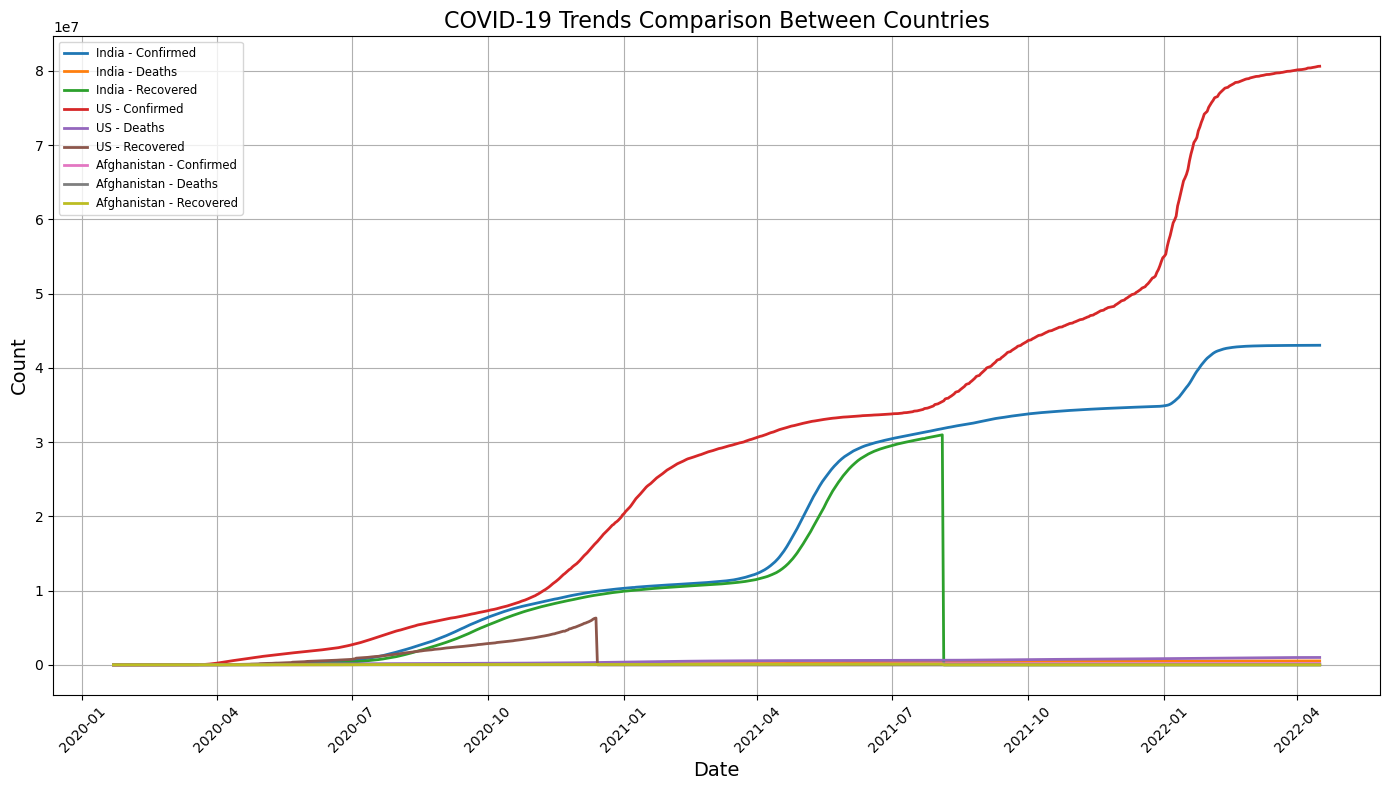

In [4]:
# Task 4: Country-Specific Analysis
# a) Allow the user to specify a country and visualize the COVID-19 trends for that specific country.
def plot_country_trends(country):
    country_data = data[data['Country'] == country]
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label='Confirmed', color='blue')
    sns.lineplot(data=country_data, x='Date', y='Deaths', label='Deaths', color='red')
    sns.lineplot(data=country_data, x='Date', y='Recovered', label='Recovered', color='green')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
country = input("Enter the name of the country to visualize its COVID-19 trends: ")
plot_country_trends(country)

# b) Compare the trends of multiple countries on the same plot to see differences and similarities.
def compare_countries(countries):
    plt.figure(figsize=(14, 8))
    
    for country in countries:
        country_data = data[data['Country'] == country]
        
        sns.lineplot(data=country_data, x='Date', y='Confirmed', label=f'{country} - Confirmed', linewidth=2)
        sns.lineplot(data=country_data, x='Date', y='Deaths', label=f'{country} - Deaths', linewidth=2)
        sns.lineplot(data=country_data, x='Date', y='Recovered', label=f'{country} - Recovered', linewidth=2)
    
    plt.title('COVID-19 Trends Comparison Between Countries', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(loc='upper left', fontsize='small')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
countries_input = input("Enter the names of countries to compare, separated by commas: ")
countries = [country.strip() for country in countries_input.split(',')]
compare_countries(countries)

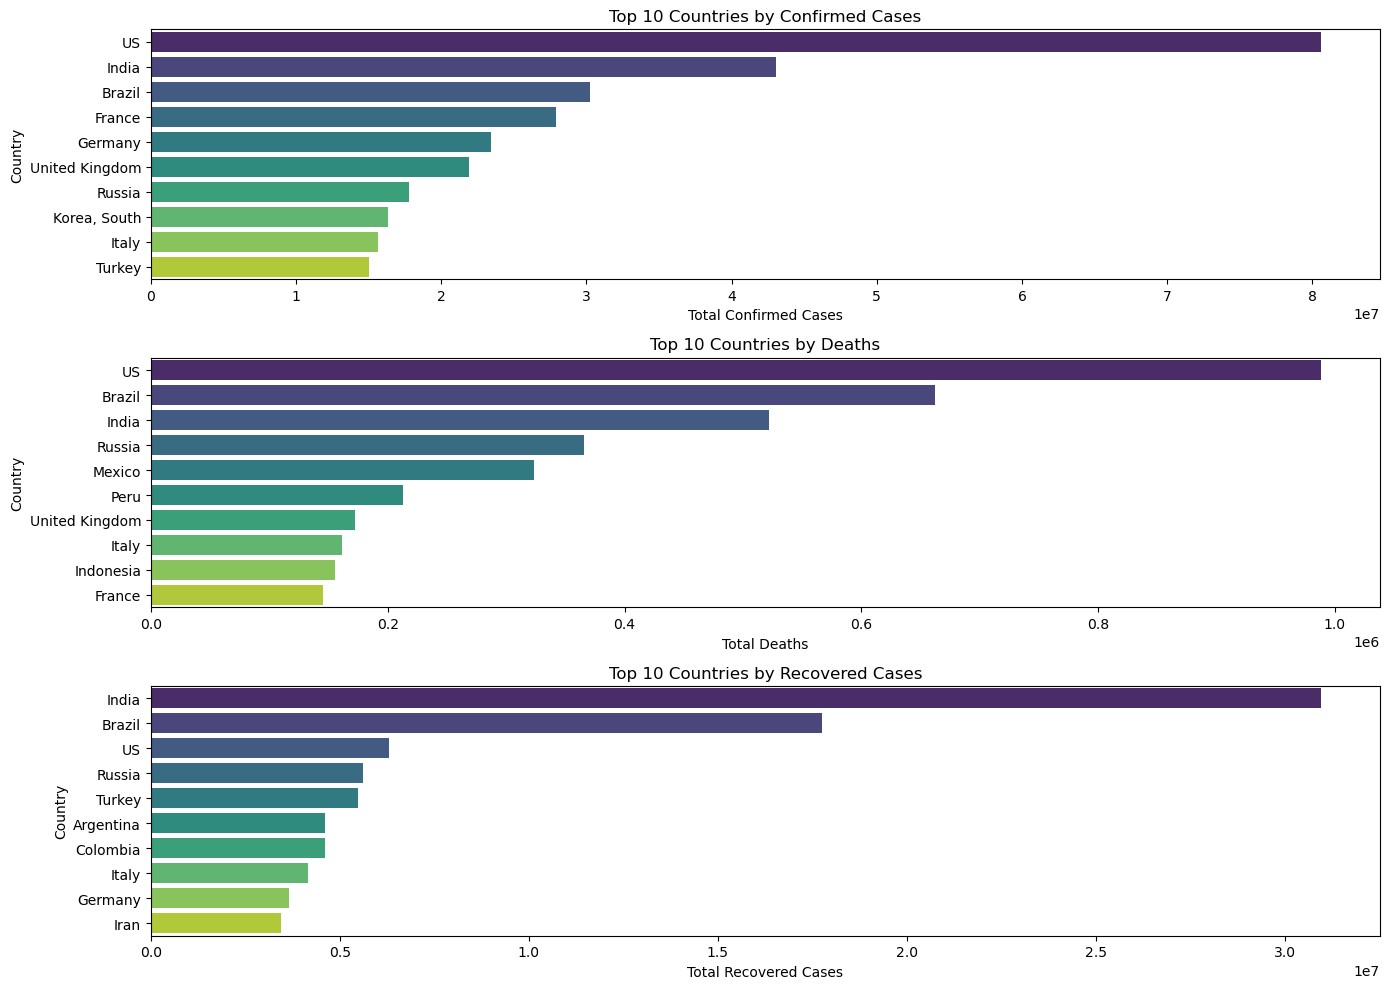

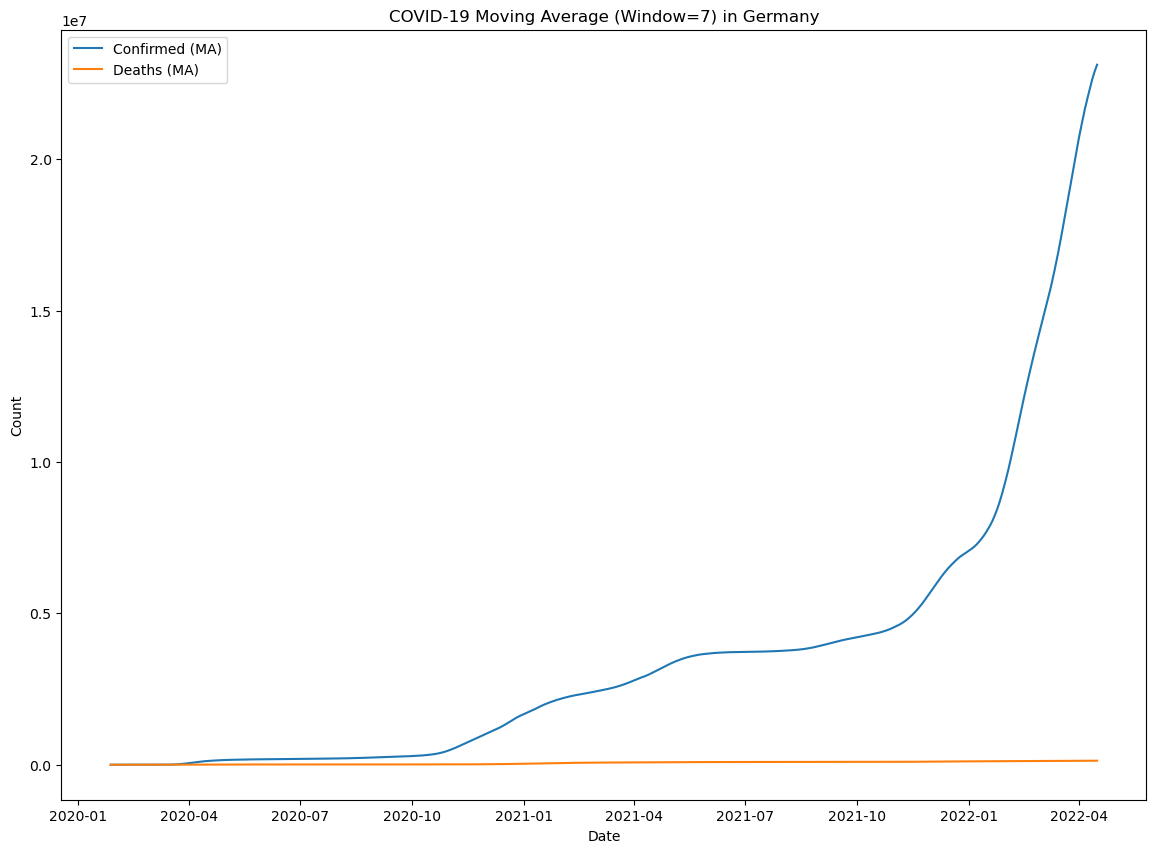

In [5]:
# Task 5: Comparative Analysis
# a) Create bar plots to compare the total number of confirmed cases, deaths, and  recoveries between the top 10 most affected countries.
country_totals = data.groupby('Country').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).reset_index()

top_10_countries_c = country_totals.nlargest(10, 'Confirmed')
top_10_countries_d = country_totals.nlargest(10, 'Deaths')
top_10_countries_r = country_totals.nlargest(10, 'Recovered')
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.barplot(data=top_10_countries_c, x='Confirmed', y='Country', palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')

plt.subplot(3, 1, 2)
sns.barplot(data=top_10_countries_d, x='Deaths', y='Country', palette='viridis')
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')

plt.subplot(3, 1, 3)
sns.barplot(data=top_10_countries_r, x='Recovered', y='Country', palette='viridis')
plt.title('Top 10 Countries by Recovered Cases')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

# b) Analyse the growth rate of cases and deaths using moving averages.
def plot_moving_average(country, window=7):
    country_data = data[data['Country'] == country].copy()
    country_data['Confirmed_MA'] = country_data['Confirmed'].rolling(window=window).mean()
    country_data['Deaths_MA'] = country_data['Deaths'].rolling(window=window).mean()
    plt.figure(figsize=(14, 10))
    sns.lineplot(data=country_data, x='Date', y='Confirmed_MA', label='Confirmed (MA)')
    sns.lineplot(data=country_data, x='Date', y='Deaths_MA', label='Deaths (MA)')
    plt.title(f'COVID-19 Moving Average (Window={window}) in {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
plot_moving_average('Germany')

           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.914993   0.277797
Deaths      0.914993  1.000000   0.318160
Recovered   0.277797  0.318160   1.000000


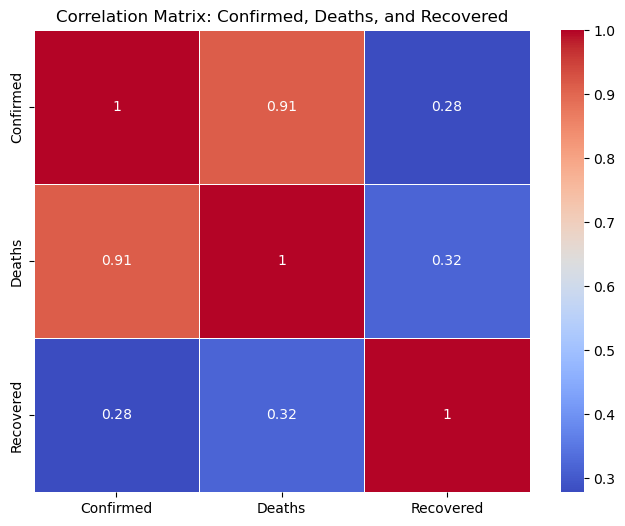

In [6]:
# Task 6: Correlation Analysis
# a) Analyse the correlation between confirmed cases, deaths, and recoveries
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered']].corr()
print(correlation_matrix)

# b) Use ‘heatmaps’ to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Confirmed, Deaths, and Recovered')
plt.show()

# COVID-19 DATA ANALYSIS PART-2

---------------------Total Confirmed Cases---------------------


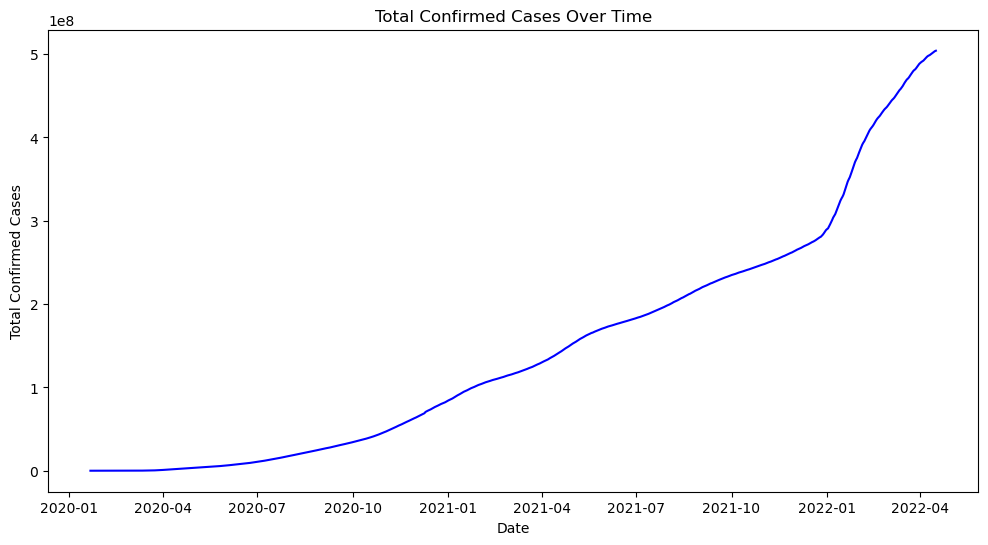

---------------------Total Deaths---------------------


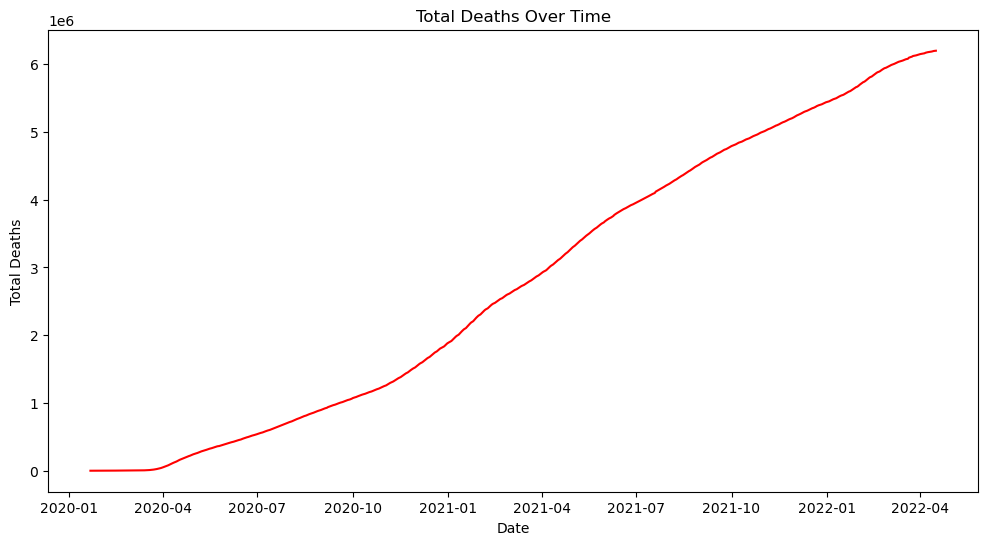

---------------------Total Recoveries---------------------


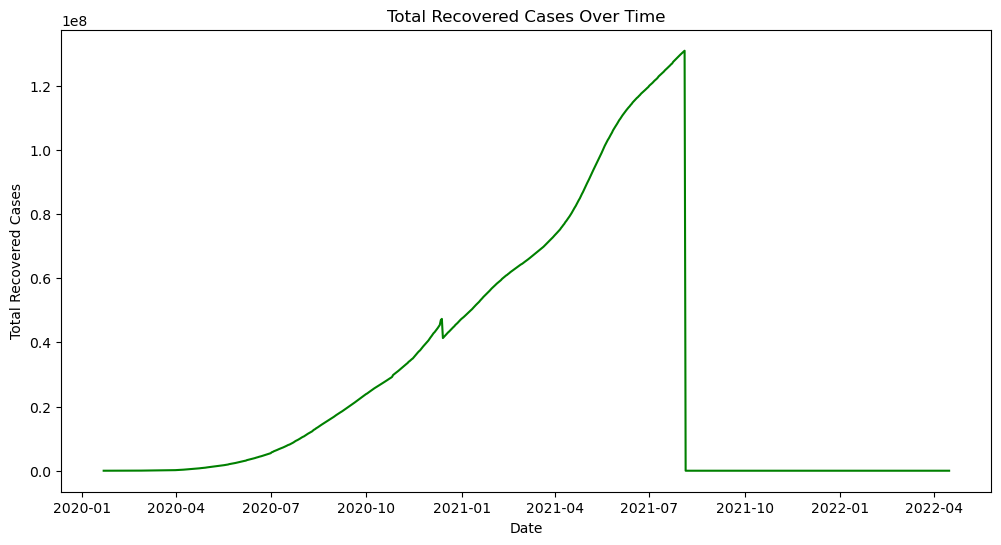

In [7]:
#1)  What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.
global_totals = data.groupby('Date').sum().reset_index()

print("---------------------Total Confirmed Cases---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Confirmed', color='blue')
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()

print("---------------------Total Deaths---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Deaths', color='red')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.show()

print("---------------------Total Recoveries---------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Recovered', color='green')
plt.title('Total Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.show()

In [8]:
#2)  Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?
latest_data = data[data['Date'] == data['Date'].max()]
highest_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
highest_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with highest confirmed cases:")
print(highest_confirmed)
print("\nCountry with highest deaths:")
print(highest_deaths)
print("\nCountry with highest recoveries:")
print(highest_recovered)

Country with highest confirmed cases:
Date         2022-04-16 00:00:00
Country                       US
Confirmed               80625120
Recovered                      0
Deaths                    988609
Name: 150143, dtype: object

Country with highest deaths:
Date         2022-04-16 00:00:00
Country                       US
Confirmed               80625120
Recovered                      0
Deaths                    988609
Name: 150143, dtype: object

Country with highest recoveries:
Date         2022-04-16 00:00:00
Country              Afghanistan
Confirmed                 178387
Recovered                      0
Deaths                      7676
Name: 815, dtype: object


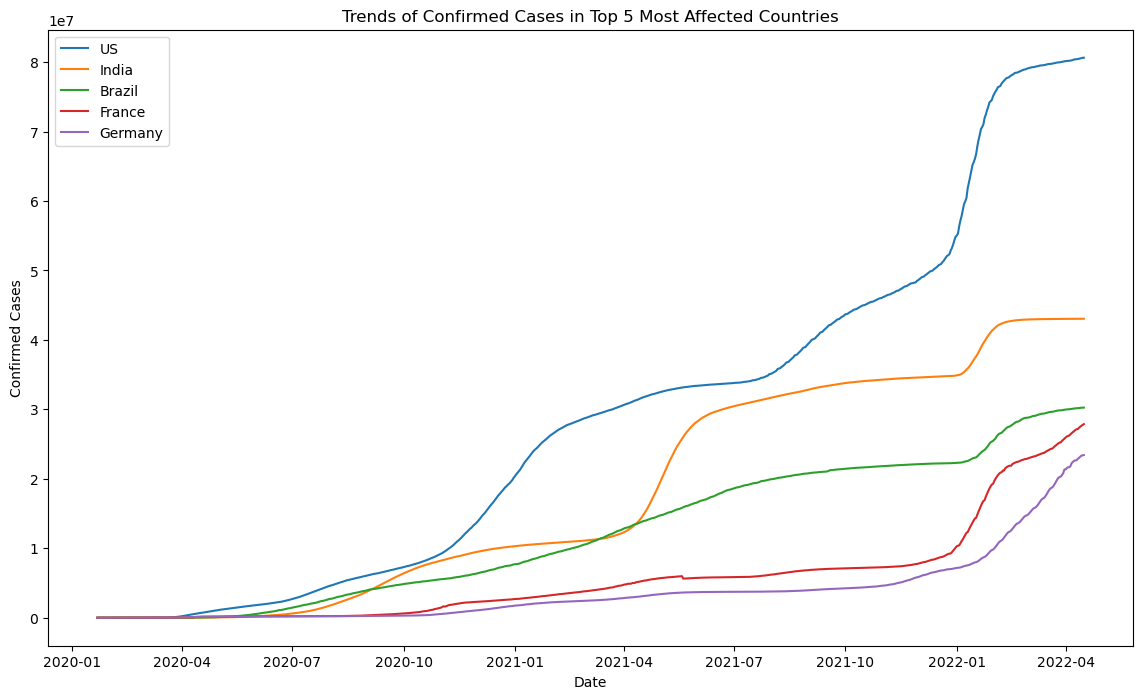

In [9]:
#3) How do the trends of confirmed cases differ between the top 5 most affected countries?
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country'].values
plt.figure(figsize=(14, 8))

for country in top_5_countries:
    country_data = data[data['Country'] == country]
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label=country)
    
plt.title('Trends of Confirmed Cases in Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

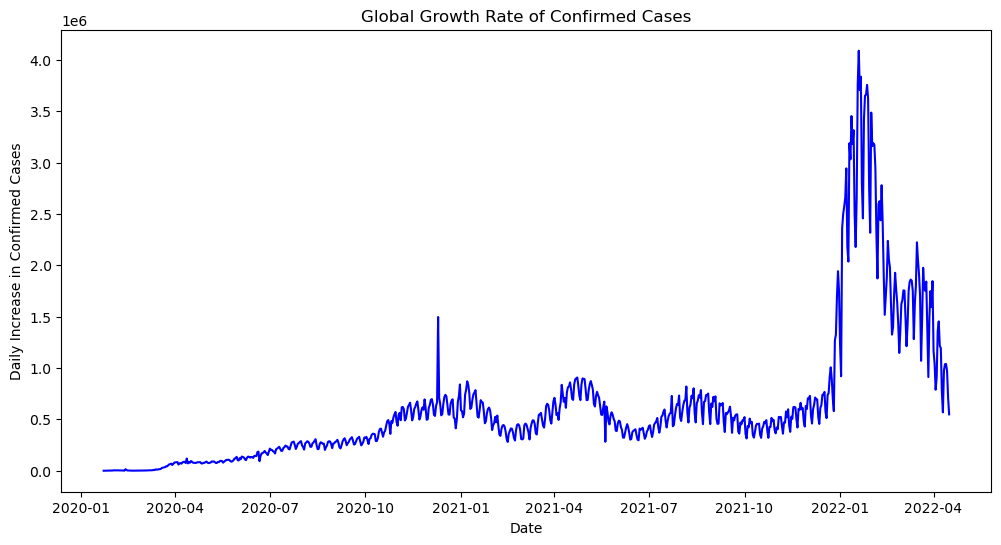

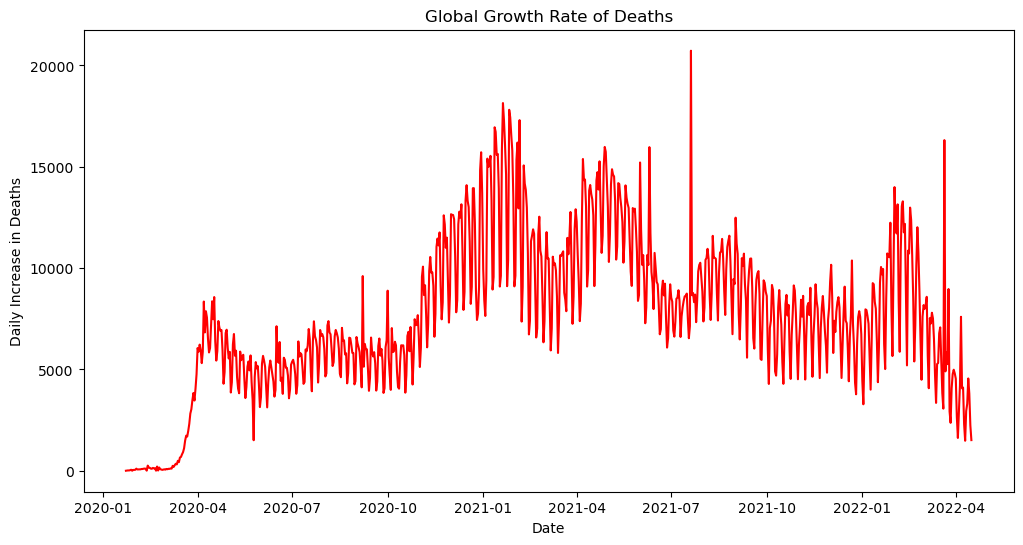

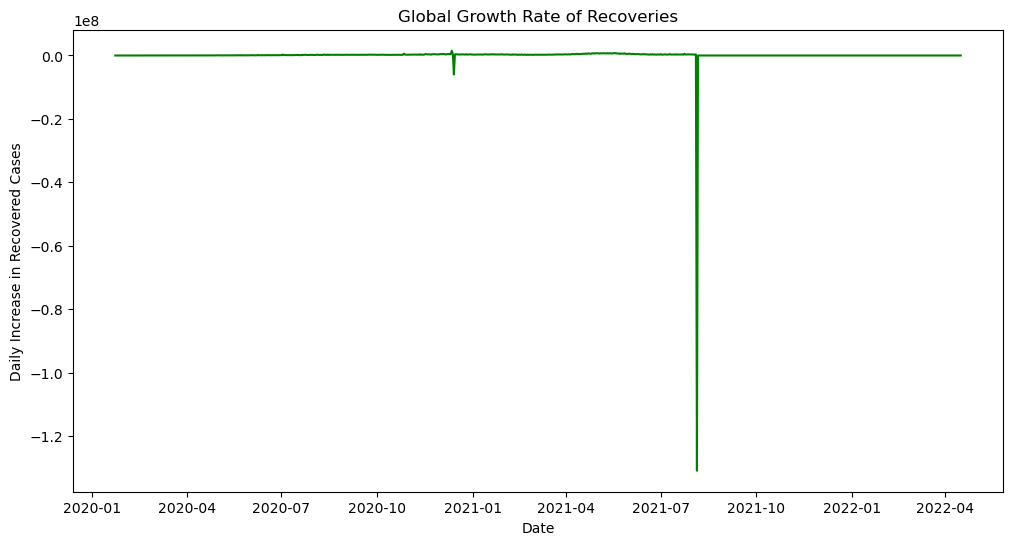

In [10]:
#4) What is the growth rate of confirmed cases, deaths, and recoveries globally?
global_totals['Confirmed_growth'] = global_totals['Confirmed'].diff()
global_totals['Deaths_growth'] = global_totals['Deaths'].diff()
global_totals['Recovered_growth'] = global_totals['Recovered'].diff()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Confirmed_growth', color='blue')
plt.title('Global Growth Rate of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Daily Increase in Confirmed Cases')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Deaths_growth', color='red')
plt.title('Global Growth Rate of Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Increase in Deaths')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Recovered_growth', color='green')
plt.title('Global Growth Rate of Recoveries')
plt.xlabel('Date')
plt.ylabel('Daily Increase in Recovered Cases')
plt.show()

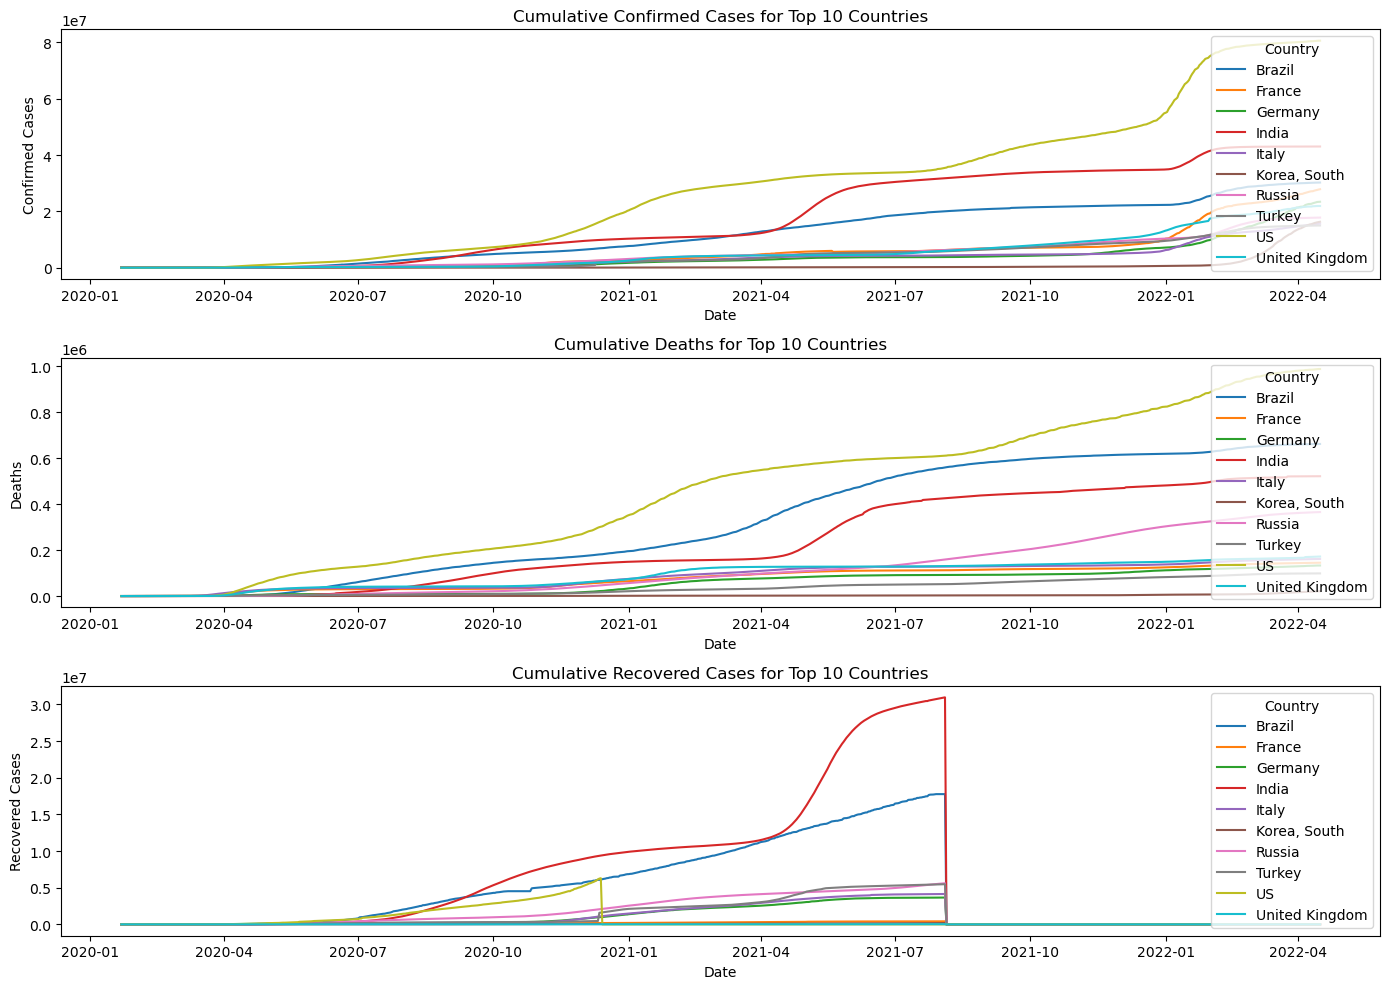

In [11]:
#5) What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most affected countries?
top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country'].values

country_totals = data[data['Country'].isin(top_10_countries)]
country_totals = country_totals.groupby(['Country', 'Date']).sum().reset_index()

plt.figure(figsize=(14, 10))

# Confirmed Cases
plt.subplot(3, 1, 1)
sns.lineplot(data=country_totals, x='Date', y='Confirmed', hue='Country')
plt.title('Cumulative Confirmed Cases for Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

# Deaths
plt.subplot(3, 1, 2)
sns.lineplot(data=country_totals, x='Date', y='Deaths', hue='Country')
plt.title('Cumulative Deaths for Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Deaths')

# Recovered Cases
plt.subplot(3, 1, 3)
sns.lineplot(data=country_totals, x='Date', y='Recovered', hue='Country')
plt.title('Cumulative Recovered Cases for Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')

plt.tight_layout()
plt.show()

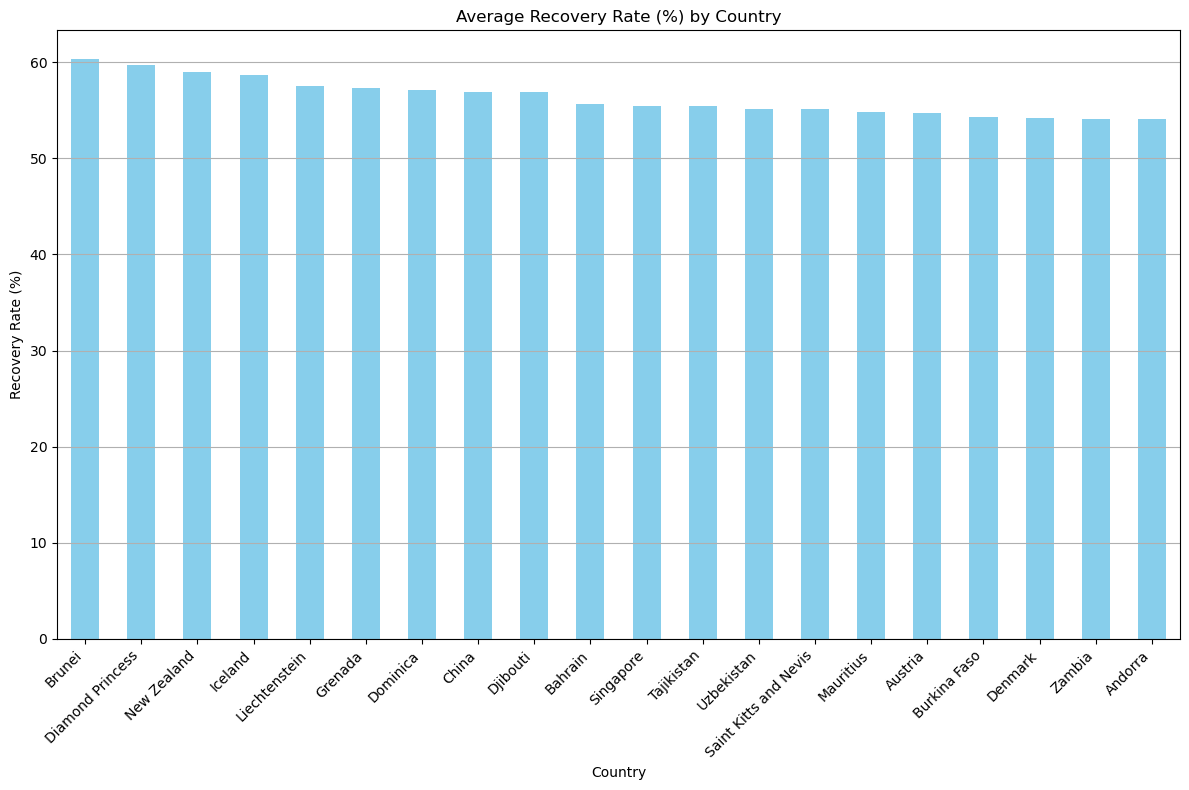

In [12]:
#6) How does the recovery rate compare across different countries?
data['RecoveryRate'] = (data['Recovered'] / data['Confirmed']) * 100

country_recovery_rates = data.groupby('Country')['RecoveryRate'].mean()

country_recovery_rates = country_recovery_rates.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
country_recovery_rates.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Recovery Rate (%) by Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

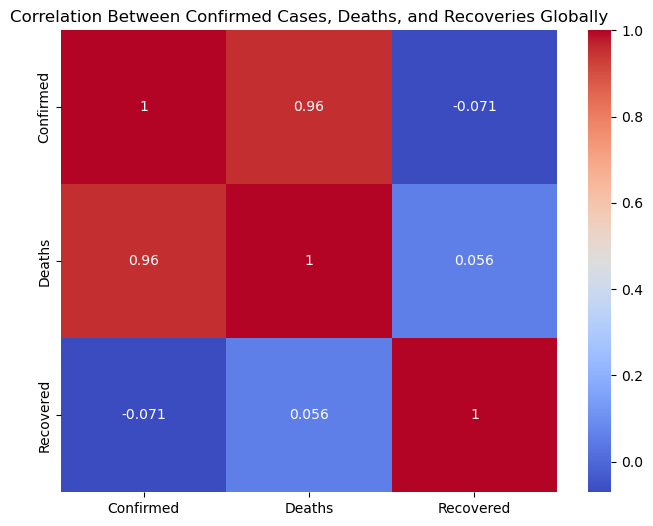

In [13]:
#7) What is the correlation between confirmed cases, deaths, and recoveries globally?
correlation_matrix = global_totals[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Confirmed Cases, Deaths, and Recoveries Globally')
plt.show()

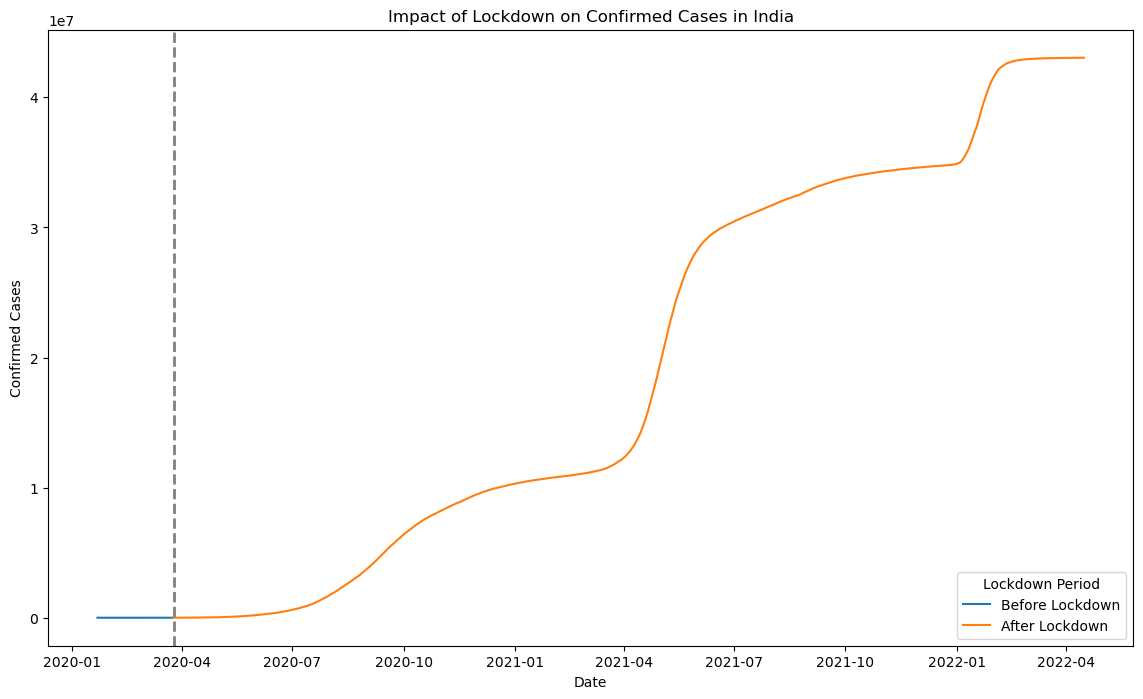

In [14]:
#8) How do lockdown measures impact the trend of confirmed cases in different countries?
import numpy as np

def plot_lockdown_impact(country, lockdown_date):
    country_data = data[data['Country'] == country]
    country_data['Lockdown'] = np.where(country_data['Date'] < lockdown_date, 'Before Lockdown', 'After Lockdown')

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', hue='Lockdown')
    plt.title(f'Impact of Lockdown on Confirmed Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.axvline(pd.to_datetime(lockdown_date), color='gray', linestyle='--', linewidth=2)
    plt.legend(title='Lockdown Period')
    plt.show()

plot_lockdown_impact('India', '2020-03-25')

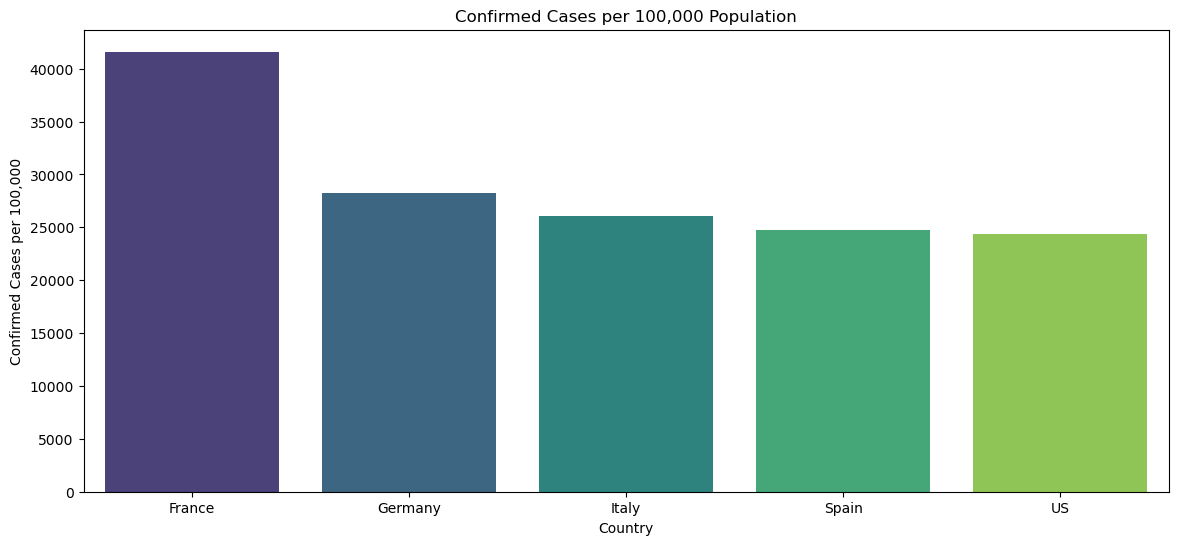

In [15]:
#9) How does the number of tests conducted relate to the number of confirmed cases in various countries?
population_data = {
    'Italy': 60_000_000,
    'Spain': 47_000_000,
    'Germany': 83_000_000,
    'France': 67_000_000,
    'US': 331_000_000
}

def plot_testing_proxy(countries):
    latest_data = data[data['Date'] == data['Date'].max()]
    latest_data = latest_data[latest_data['Country'].isin(countries)]

    latest_data['Population'] = latest_data['Country'].map(population_data)
    latest_data['Confirmed_per_100k'] = (latest_data['Confirmed'] / latest_data['Population']) * 100000

    plt.figure(figsize=(14, 6))
    sns.barplot(data=latest_data, x='Country', y='Confirmed_per_100k', palette='viridis')
    plt.title('Confirmed Cases per 100,000 Population')
    plt.xlabel('Country')
    plt.ylabel('Confirmed Cases per 100,000')
    plt.show()
    
plot_testing_proxy(['Italy', 'Spain', 'Germany', 'France', 'US'])

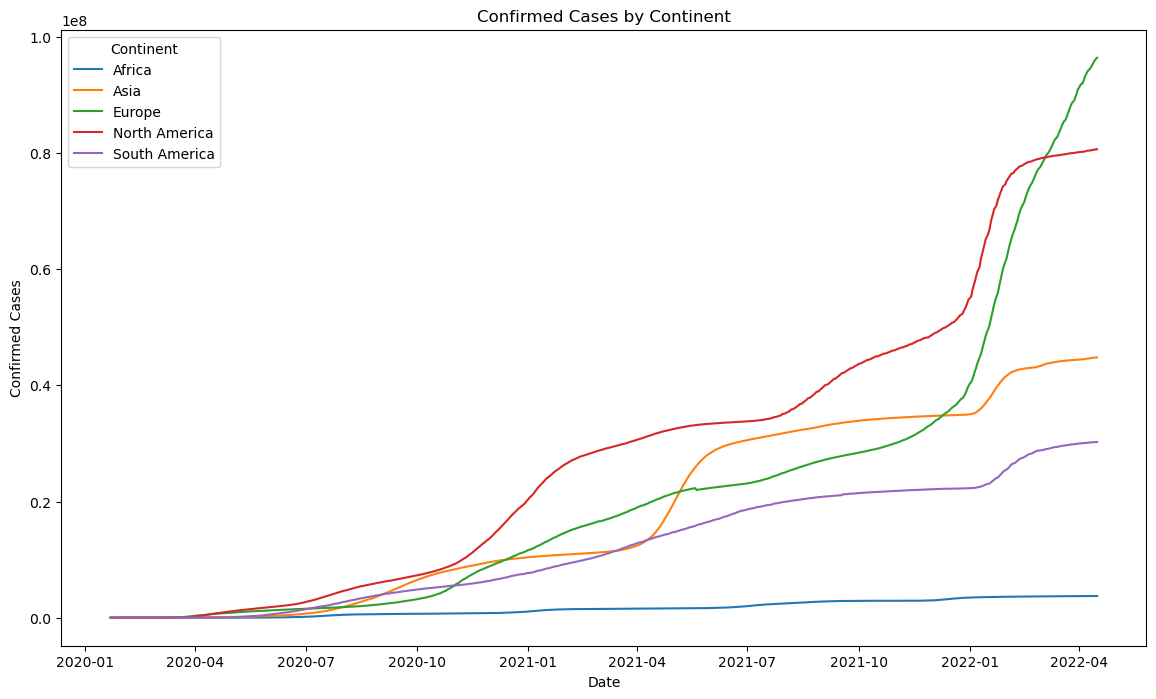

In [16]:
#10)  What is the distribution of confirmed cases, deaths, and recoveries by continent?
continent_data = {
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'US': 'North America',
    'Brazil': 'South America',
    'India': 'Asia',
    'Russia': 'Europe',
    'China': 'Asia',
    'South Africa': 'Africa'
}
data['Continent'] = data['Country'].map(continent_data)
continent_totals = data.groupby(['Continent', 'Date']).sum().reset_index()

# Confirmed Cases by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Confirmed', hue='Continent')
plt.title('Confirmed Cases by Continent')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Continent')
plt.show()

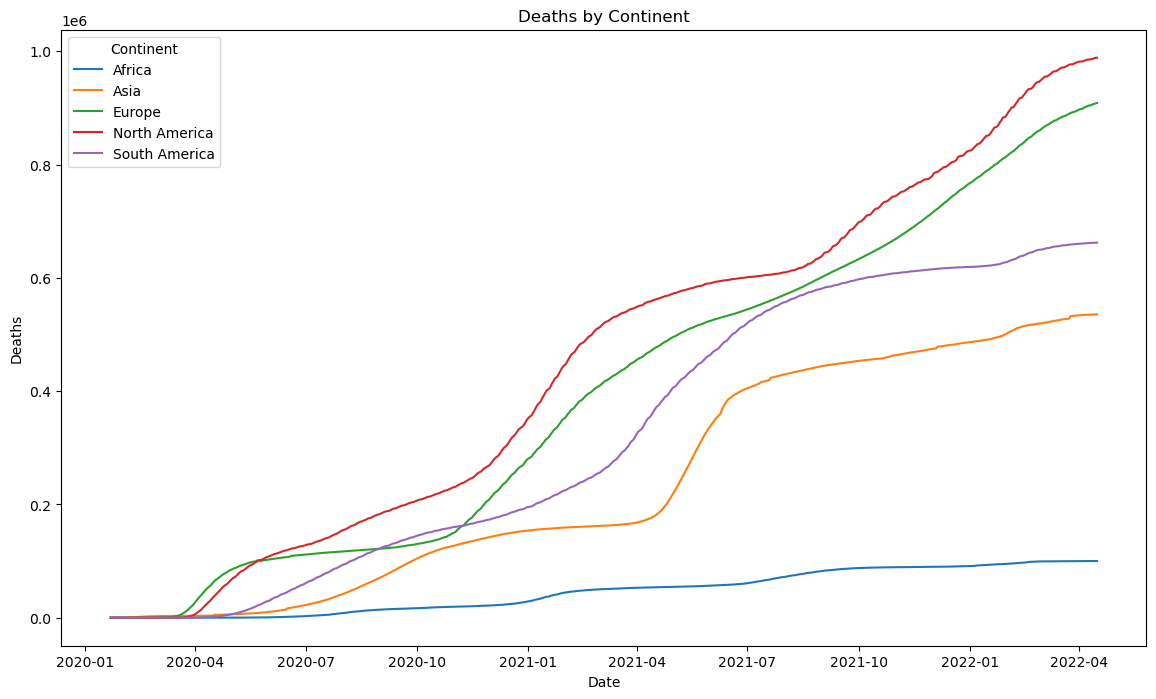

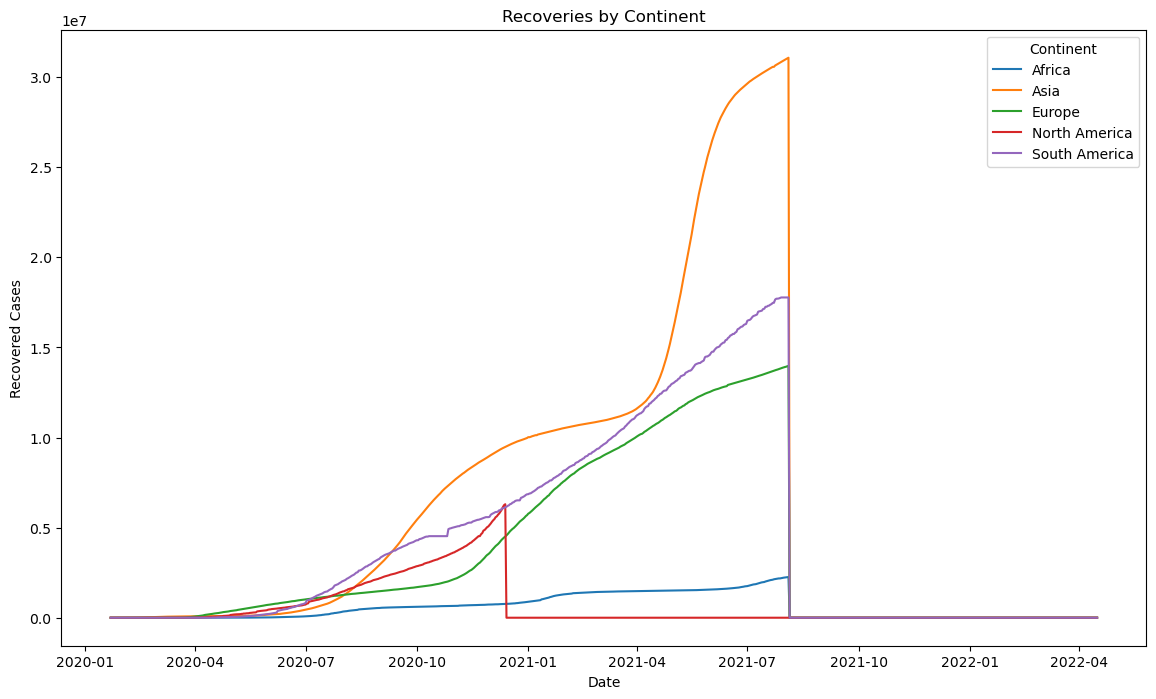

In [17]:
# Deaths by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Deaths', hue='Continent')
plt.title('Deaths by Continent')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend(title='Continent')
plt.show()

# Recoveries by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Recovered', hue='Continent')
plt.title('Recoveries by Continent')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.legend(title='Continent')
plt.show()

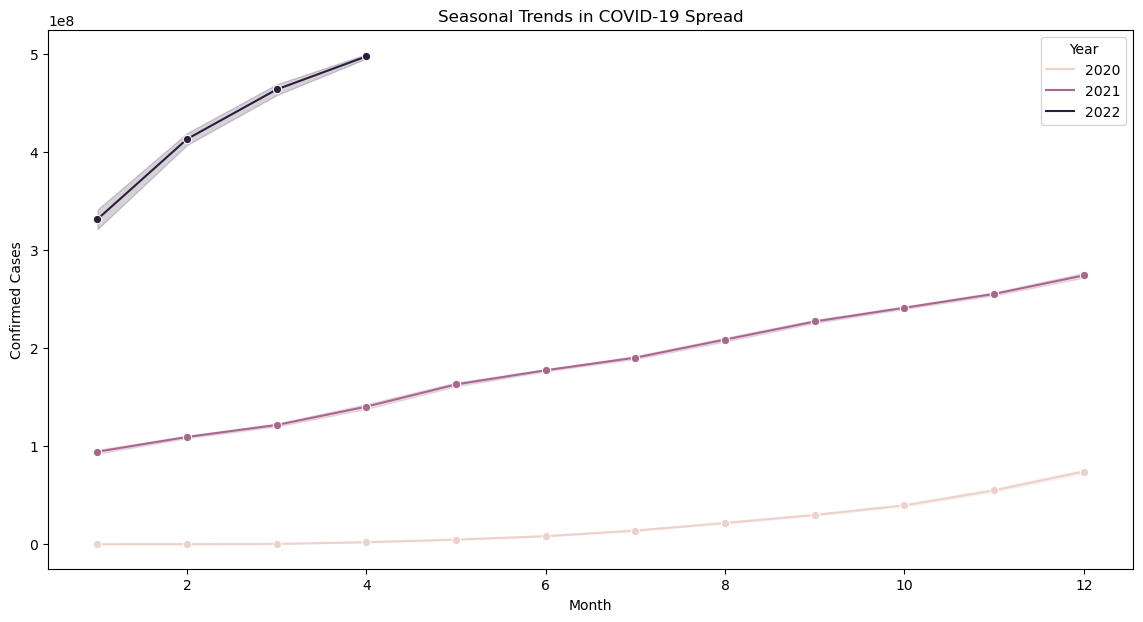

In [18]:
#Additional Analysis
# Seasonal Trends in COVID-19 Spread
global_data = data.groupby('Date').sum().reset_index()
global_data['Month'] = global_data['Date'].dt.month
global_data['Year'] = global_data['Date'].dt.year

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Confirmed', hue='Year', data=global_data, marker='o')
plt.xlabel('Month')
plt.ylabel('Confirmed Cases')
plt.title('Seasonal Trends in COVID-19 Spread')
plt.legend(title='Year')
plt.show()